In [ ]:
!pip install scikeras
!pip install emoji
!pip install langdetect
!pip install contractions

In [ ]:
# Import necessary libraries and modules for machine learning and data analysis.

# Standard libraries
import os             # Operating System module for interacting with the operating system
import pickle         # Pickle module for object serialization and deserialization
import sklearn        # Scikit-learn library for machine learning
import numpy as np     # NumPy library for numerical operations
import matplotlib.pyplot as plt  # Matplotlib for creating visualizations
import seaborn as sns           # Seaborn for statistical data visualization
import pandas as pd             # Pandas library for data manipulation and analysis

In [ ]:
# Machine learning modules
from sklearn import tree, metrics            # Decision tree classifier and metrics module
from sklearn.metrics import accuracy_score   # Accuracy score metric
from sklearn.metrics import confusion_matrix  # Confusion matrix for classification evaluation
from sklearn.metrics import classification_report  # Classification report for detailed metrics

In [ ]:
# Deep learning modules (TensorFlow)
from tensorflow.keras.models import Sequential            # Sequential model for stacking layers
from tensorflow.keras.layers import LSTM, Dense, Dropout  # LSTM, Dense, and Dropout layers
from tensorflow.keras.layers import SpatialDropout1D      # Spatial Dropout layer
from tensorflow.keras.layers import Embedding              # Embedding layer for word embeddings
from sklearn.model_selection import train_test_split      # Train-test split for data splitting
from tensorflow.keras.preprocessing.text import Tokenizer  # Tokenizer for text preprocessing
from tensorflow.keras.preprocessing.sequence import pad_sequences  # Padding sequences for equal length

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SpatialDropout1D, LSTM, Dropout, Dense, BatchNormalization
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.layers import LeakyReLU


In [ ]:
# Model evaluation and tuning modules
from sklearn.model_selection import KFold, GridSearchCV   # K-Fold cross-validation and GridSearchCV for hyperparameter tuning
from sklearn.metrics import precision_score, recall_score  # Precision and recall scores

In [ ]:
# Text cleaning
import re
import string
import emoji
import nltk
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Data preprocessing
from sklearn import preprocessing
from imblearn.over_sampling import RandomOverSampler
from langdetect import detect, LangDetectException
import contractions
from nltk.tokenize import word_tokenize

from tensorflow.keras.metrics import AUC
from tensorflow.keras import backend as K


# Define stop words for text cleaning
stop_words = set(stopwords.words('english'))

# Initialize lemmatizer for text cleaning
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
# Google Colab specific module for mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Read the CSV file containing cyberbullying tweets into a Pandas DataFrame
bully_d = pd.read_csv('/content/drive/MyDrive/Artificial Intelligence/AI Final Project/cyberbullying_tweets.csv')

# **Explanatory Data Analysis**

In [ ]:
#Display the DataFrame, showing the rows and columns of the data, along with the values in each cell.
bully_d

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying
...,...,...
47687,"Black ppl aren't expected to do anything, depe...",ethnicity
47688,Turner did not withhold his disappointment. Tu...,ethnicity
47689,I swear to God. This dumb nigger bitch. I have...,ethnicity
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,ethnicity


In [ ]:
# Generate descriptive statistics of the DataFrame
bully_d.describe()

,tweet_text,cyberbullying_type
count,47692,47692
unique,46017,6
top,RT @sailorhg: the intro for my hardware hackin...,religion
freq,2,7998


In [ ]:
# Display concise summary information about the DataFrame
bully_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47692 entries, 0 to 47691
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          47692 non-null  object
 1   cyberbullying_type  47692 non-null  object
dtypes: object(2)
memory usage: 745.3+ KB


In [ ]:
# Get the column labels of the DataFrame
bully_d.columns

Index(['tweet_text', 'cyberbullying_type'], dtype='object')

In [ ]:
# Get the unique values in the 'cyberbullying_type' column
bully_d['cyberbullying_type'].unique()


In [ ]:
num_classes = bully_d['cyberbullying_type'].nunique()

In [ ]:
#Checking for null values
bully_d.isnull().sum()

tweet_text            0
cyberbullying_type    0
dtype: int64

In [ ]:
bully_d['cyberbullying_type'].value_counts()

religion               7998
age                    7992
gender                 7973
ethnicity              7961
not_cyberbullying      7945
other_cyberbullying    7823
Name: cyberbullying_type, dtype: int64

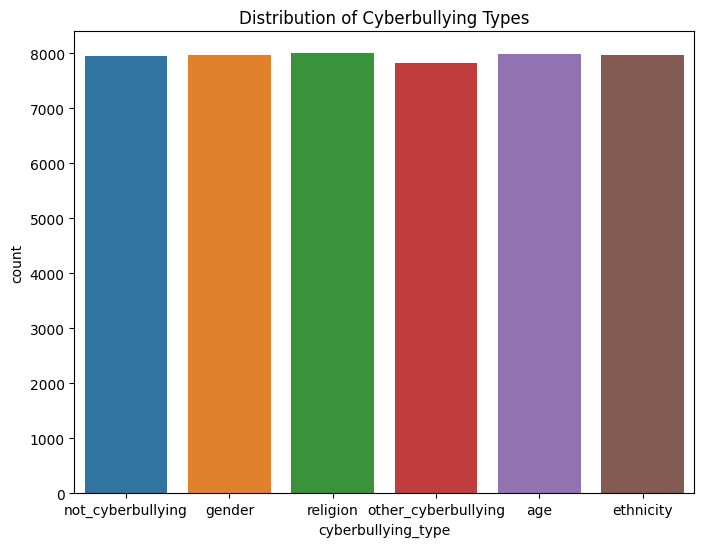

In [ ]:
# Set the figure size
plt.figure(figsize=(8, 6))

# Create a count plot using seaborn
sns.countplot(x='cyberbullying_type', data=bully_d)

# Set the title of the plot
plt.title('Distribution of Cyberbullying Types')

# Show the plot
plt.show()

In [ ]:
import plotly.express as px

# Create a pie chart using plotly.express
fig = px.pie(bully_d, names='cyberbullying_type', title='Pie chart of different sentiments of tweets')

# Show the pie chart
fig.show()

<Axes: >

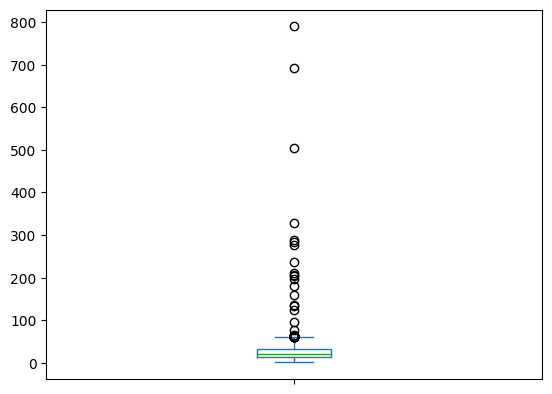

In [ ]:
# Calculate tweet lengths
tweet_len = pd.Series([len(tweet.split()) for tweet in bully_d['tweet_text']])

# The distribution of tweet text lengths
tweet_len.plot(kind='box')

In [ ]:
# Clean emojis from text
def strip_emoji(text):
    return emoji.demojize(text)
# Remove punctuations, stopwords, links, mentions and new line characters
def strip_all_entities(text):
    text = re.sub(r'\r|\n', ' ', text.lower())
    text = re.sub(r"(?:\@|https?\://)\S+", "", text)
    text = re.sub(r'[^\x00-\x7f]', '', text)
    banned_list = string.punctuation
    table = str.maketrans('', '', banned_list)
    text = text.translate(table)
    text = ' '.join(word for word in text.split() if word not in stop_words)
    return text

# Clean hashtags at the end of the sentence, and keep those in the middle of the sentence by removing just the # symbol
def clean_hashtags(tweet):
    # Remove hashtags at the end of the sentence
    new_tweet = re.sub(r'(\s+#[\w-]+)+\s*$', '', tweet).strip()

    # Remove the # symbol from hashtags in the middle of the sentence
    new_tweet = re.sub(r'#([\w-]+)', r'\1', new_tweet).strip()

    return new_tweet

# Filter special characters such as & and $ present in some words
def filter_chars(text):
    return ' '.join('' if ('$' in word) or ('&' in word) else word for word in text.split())

# Remove multiple spaces
def remove_mult_spaces(text):
    return re.sub(r"\s\s+", " ", text)

# Function to check if the text is in English, and return an empty string if it's not
def filter_non_english(text):
    try:
        lang = detect(text)
    except LangDetectException:
        lang = "unknown"
    return text if lang == "en" else ""

# Expand contractions
def expand_contractions(text):
    return contractions.fix(text)

# Remove numbers
def remove_numbers(text):
    return re.sub(r'\d+', '', text)

# Lemmatize words
def lemmatize(text):
    words = word_tokenize(text)
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized_words)

# Remove short words
def remove_short_words(text, min_len=2):
    words = text.split()
    long_words = [word for word in words if len(word) >= min_len]
    return ' '.join(long_words)

# Replace elongated words with their base form
def replace_elongated_words(text):
    regex_pattern = r'\b(\w+)((\w)\3{2,})(\w*)\b'
    return re.sub(regex_pattern, r'\1\3\4', text)

# Remove repeated punctuation
def remove_repeated_punctuation(text):
    return re.sub(r'[\?\.\!]+(?=[\?\.\!])', '', text)

# Remove extra whitespace
def remove_extra_whitespace(text):
    return ' '.join(text.split())

def remove_url_shorteners(text):
    return re.sub(r'(?:http[s]?://)?(?:www\.)?(?:bit\.ly|goo\.gl|t\.co|tinyurl\.com|tr\.im|is\.gd|cli\.gs|u\.nu|url\.ie|tiny\.cc|alturl\.com|ow\.ly|bit\.do|adoro\.to)\S+', '', text)

# Remove spaces at the beginning and end of the tweet
def remove_spaces_tweets(tweet):
    return tweet.strip()

# Function to call all the cleaning functions in the correct order
def clean_tweet(tweet):
    tweet = strip_emoji(tweet)
    tweet = expand_contractions(tweet)
    tweet = filter_non_english(tweet)
    tweet = strip_all_entities(tweet)
    tweet = clean_hashtags(tweet)
    tweet = filter_chars(tweet)
    tweet = remove_mult_spaces(tweet)
    tweet = remove_numbers(tweet)
    tweet = lemmatize(tweet)
    tweet = remove_short_words(tweet)
    tweet = replace_elongated_words(tweet)
    tweet = remove_repeated_punctuation(tweet)
    tweet = remove_extra_whitespace(tweet)
    tweet = remove_url_shorteners(tweet)
    tweet = remove_spaces_tweets(tweet)
    tweet = ' '.join(tweet.split())  # Remove multiple spaces between words
    return tweet

In [ ]:
bully_d['text_clean'] = [clean_tweet(tweet) for tweet in bully_d['tweet_text']]

In [ ]:
bully_d['word_count'] = bully_d['text_clean'].apply(lambda x: len(x.split()))

In [ ]:
longest_tweet_by_words = bully_d[bully_d['word_count'] == bully_d['word_count'].max()]
longest_tweet_by_words

In [ ]:
longest_tweet_length=longest_tweet_by_words['word_count'].max()
longest_tweet_length

In [ ]:
bully_d.head()

,tweet_text,cyberbullying_type,text_clean,word_count,length
0,"In other words #katandandre, your food was cra...",not_cyberbullying,word katandandre food crapilicious mkr,5,61
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,aussietv white mkr theblock imacelebrityau tod...,11,115
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,classy whore red velvet cupcake,5,60
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,meh thanks head concerned another angry dude t...,8,103
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,isi account pretending kurdish account like is...,8,103


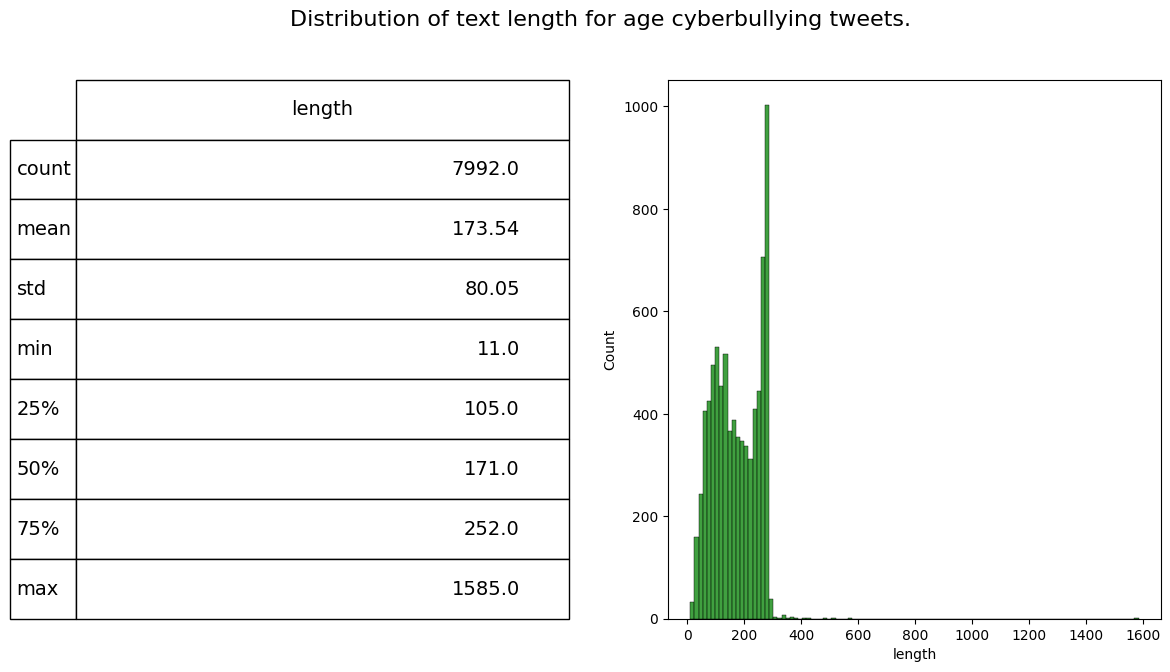

In [ ]:
# Assuming 'text' is the column containing the text
bully_d['length'] = bully_d['tweet_text'].apply(len)

# Set the figure size
fig = plt.figure(figsize=(14, 7))

# Add a subplot on the right (1 row, 2 columns, position 2)
ax1 = fig.add_subplot(122)

# Create a histogram using seaborn for the text length of age-related cyberbullying tweets
sns.histplot(bully_d[bully_d['cyberbullying_type'] == 'age']['length'], ax=ax1, color='green')

# Calculate and display descriptive statistics for text length
describe = bully_d.length[bully_d.cyberbullying_type == 'age'].describe().to_frame().round(2)

# Add a subplot on the left (1 row, 2 columns, position 1)
ax2 = fig.add_subplot(121)

# Turn off axis for the second subplot
ax2.axis('off')

# Set font size and create a table for descriptive statistics
font_size = 14
bbox = [0, 0, 1, 1]
table = ax2.table(cellText=describe.values, rowLabels=describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)

# Set the overall title for the figure
fig.suptitle('Distribution of text length for age cyberbullying tweets.', fontsize=16)

# Show the plot
plt.show()

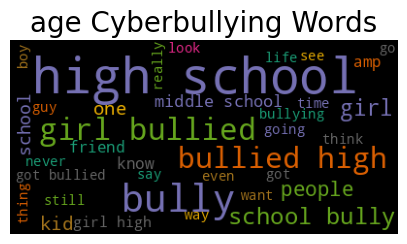

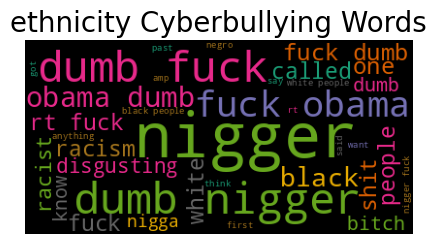

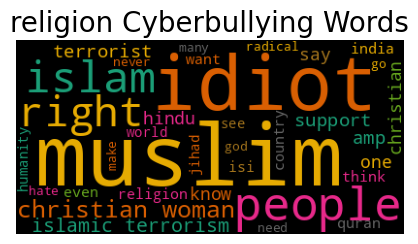

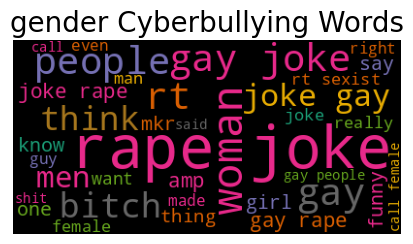

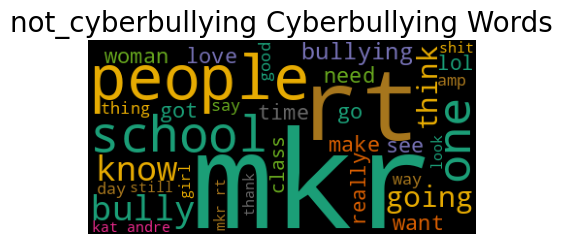

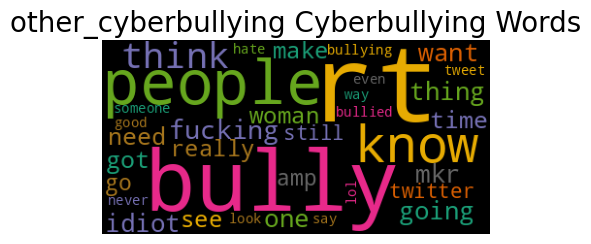

In [ ]:
from wordcloud import WordCloud, STOPWORDS

def wordcount_gen(bully_d, cyberbullying_type):
    '''
    Generating Word Cloud
    inputs:
       - bully_d: tweets dataset
       - cyberbullying_type: Type of cyberbullying (e.g., age, ethnicity, religion, gender, not_cyberbullying, other_cyberbullying)
    '''
    # Combine all tweets of the specified cyberbullying type
    combined_tweets = " ".join([tweet for tweet in bully_d[bully_d.cyberbullying_type == cyberbullying_type]['text_clean']])

    # Initialize WordCloud object
    wc = WordCloud(background_color='black',colormap="Dark2",
                   max_words=35,
                   stopwords=STOPWORDS)

    # Generate and plot word cloud
    plt.figure(figsize=(5, 5))
    plt.imshow(wc.generate(combined_tweets))
    plt.title('{} Cyberbullying Words'.format(cyberbullying_type), fontsize=20)
    plt.axis('off')
    plt.show()

# Generate word clouds for different types of cyberbullying

# Age-related cyberbullying
wordcount_gen(bully_d, 'age')

# Ethnicity-related cyberbullying
wordcount_gen(bully_d, 'ethnicity')

# Religion-related cyberbullying
wordcount_gen(bully_d, 'religion')

# Gender-related cyberbullying
wordcount_gen(bully_d, 'gender')

# Not classified as cyberbullying
wordcount_gen(bully_d, 'not_cyberbullying')

# Other types of cyberbullying
wordcount_gen(bully_d, 'other_cyberbullying')

In [ ]:
from textblob import TextBlob

bully_d['sentiment'] = bully_d['text_clean'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [ ]:
bully_d

,tweet_text,cyberbullying_type,text_clean,word_count,length,sentiment
0,"In other words #katandandre, your food was cra...",not_cyberbullying,word katandandre food crapilicious mkr,5,61,0.000000
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,aussietv white mkr theblock imacelebrityau tod...,11,115,0.000000
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,classy whore red velvet cupcake,5,60,0.050000
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,meh thanks head concerned another angry dude t...,8,103,-0.150000
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,isi account pretending kurdish account like is...,8,103,0.000000
...,...,...,...,...,...,...
47687,"Black ppl aren't expected to do anything, depe...",ethnicity,black people expected anything depended anythi...,21,234,0.010417
47688,Turner did not withhold his disappointment. Tu...,ethnicity,turner withhold disappointment turner called c...,29,276,-0.300000
47689,I swear to God. This dumb nigger bitch. I have...,ethnicity,swear god dumb nigger bitch got bleach hair re...,13,104,-0.387500
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,ethnicity,yea fuck rt nigger fucking unfollow fucking du...,9,90,-0.458333


# **FEATURE ENGINEERING**

In [ ]:
# Convert the 'cyberbullying_type' column into numerical labels
cyberbullying_label = bully_d.cyberbullying_type.factorize()

In [ ]:
# Extract the 'tweet_text' column from the DataFrame as an array
bully = bully_d.text_clean.values

# Create a Tokenizer with a specified vocabulary size
tokenizer = Tokenizer(num_words=10000)

# Fit the Tokenizer on the text data
tokenizer.fit_on_texts(bully)

# Get the vocabulary size (number of unique words)
vocab_size = len(tokenizer.word_index) + 1

# Convert the text data to sequences of integers using the Tokenizer
encoded_docs = tokenizer.texts_to_sequences(bully)

# Pad the sequences to ensure they have the same length
padded_sequence = pad_sequences(encoded_docs, maxlen=longest_tweet_length)

In [ ]:
#Output a dictionary containing the word index generated by the Tokenizer.
print(tokenizer.word_index)

{'school': 1, 'like': 2, 'fuck': 3, 'girl': 4, 'people': 5, 'joke': 6, 'nigger': 7, 'bully': 8, 'high': 9, 'dumb': 10, 'muslim': 11, 'bullied': 12, 'gay': 13, 'rape': 14, 'rt': 15, 'one': 16, 'idiot': 17, 'woman': 18, 'get': 19, 'would': 20, 'black': 21, 'know': 22, 'as': 23, 'amp': 24, 'bitch': 25, 'mkr': 26, 'think': 27, 'white': 28, 'right': 29, 'make': 30, 'say': 31, 'christian': 32, 'want': 33, 'call': 34, 'got': 35, 'go': 36, 'can': 37, 'not': 38, 'time': 39, 'even': 40, 'fucking': 41, 'see': 42, 'going': 43, 'thing': 44, 'shit': 45, 'never': 46, 'called': 47, 'really': 48, 'terrorist': 49, 'still': 50, 'year': 51, 'hate': 52, 'need': 53, 'support': 54, 'first': 55, 'islam': 56, 'said': 57, 'islamic': 58, 'look': 59, 'way': 60, 'good': 61, 'friend': 62, 'also': 63, 'female': 64, 'guy': 65, 'mean': 66, 'man': 67, 'anything': 68, 'kid': 69, 'life': 70, 'love': 71, 'obama': 72, 'terrorism': 73, 'radical': 74, 'back': 75, 'day': 76, 'racist': 77, 'men': 78, 'sexist': 79, 'stop': 80, 

In [ ]:
# Print the original text of the first tweet in the 'bully' array
print(bully[0])

# Print the corresponding sequence of integers generated by the Tokenizer for the first tweet
print(encoded_docs[0])


word katandandre food crapilicious mkr
[85, 2298, 543, 26]


In [ ]:
# Print the padded sequence of integers for the first tweet
print(padded_sequence[0])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0 

In [ ]:
# Features (X): All columns except 'cyberbullying_type' and 'tweet_text'
X = padded_sequence

# Target variable (y): 'cyberbullying_type' column
y = cyberbullying_label[0]

In [ ]:
# Splitting the dataset into training and testing sets
# X: Features, y: Target variable
# test_size: Proportion of the dataset to include in the test split (20% in this case)
# random_state: Seed for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **TRAINING AND TESTING**

In [ ]:
# Define the length of the embedding vector
embedding_dim = 100

def create_lstm_model(lstm_units,dropout_rate):
    model = Sequential()
    model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=longest_tweet_length))
    model.add(SpatialDropout1D(0.25))
    model.add(LSTM(lstm_units, dropout=dropout_rate,activation=LeakyReLU(alpha=0.1), recurrent_dropout=0.5, return_sequences=True))
    model.add(LSTM(lstm_units, dropout=dropout_rate,activation=LeakyReLU(alpha=0.1), recurrent_dropout=0.5))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [ ]:
# Include default values of the parameters that will be tuned in the grid search
model = KerasClassifier(build_fn=create_lstm_model, lstm_units=32, dropout_rate=0.3, epochs=3, batch_size=128,verbose=1)

In [ ]:
param_grid = {
    'lstm_units': [32, 64],
    'dropout_rate': [0.3,0.5]
}

In [ ]:
cv=KFold(n_splits=2,shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=cv)

In [ ]:
grid_result = grid.fit(X_train, y_train, validation_data=(X_test, y_test))

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/3
150/150 [==============================] - 615s 4s/step - loss: 0.8959 - accuracy: 0.6435 - val_loss: 1.2827 - val_accuracy: 0.7617
Epoch 2/3
150/150 [==============================] - 598s 4s/step - loss: 0.5203 - accuracy: 0.7834 - val_loss: 0.8142 - val_accuracy: 0.7686
Epoch 3/3
150/150 [==============================] - 35s 229ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/3
150/150 [==============================] - 678s 4s/step - loss: 0.8987 - accuracy: 0.6417 - val_loss: 1.2858 - val_accuracy: 0.7359
Epoch 2/3
150/150 [==============================] - 602s 4s/step - loss: 0.5163 - accuracy: 0.7846 - val_loss: 0.8133 - val_accuracy: 0.7840
Epoch 3/3
150/150 [==============================] - 32s 211ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/3
150/150 [==============================] - 605s 4s/step - loss: 0.8320 - accuracy: 0.6652 - val_loss: 1.6010 - val_accuracy: 0.5394
Epoch 2/3
150/150 [==============================] - 593s 4s/step - loss: 0.4849 - accuracy: 0.8022 - val_loss: 1.3839 - val_accuracy: 0.6407
Epoch 3/3
150/150 [==============================] - 32s 213ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/3
150/150 [==============================] - 604s 4s/step - loss: 0.8098 - accuracy: 0.6719 - val_loss: 1.2332 - val_accuracy: 0.7312
Epoch 2/3
150/150 [==============================] - 584s 4s/step - loss: nan - accuracy: 0.3123 - val_loss: nan - val_accuracy: 0.1702
Epoch 3/3
150/150 [==============================] - 32s 211ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.



Epoch 1/3
 80/150 [===============>..............] - ETA: 4:32 - loss: 1.2192 - accuracy: 0.5233

In [ ]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

In [ ]:
# Assuming best_params contains values for 'batch_size' and 'epochs' as well
best_params = grid.best_params_
best_params

In [ ]:
# # Building a sequential neural network model for text classification

# Define the length of the embedding vector
embedding_dim = 100

# Initialize a Sequential model
model = Sequential()

# Add an Embedding layer with specified parameters
model.add(Embedding(input_dim=vocab_size,
                            output_dim=embedding_dim,
                            input_length=373,
                            ))

# Add a SpatialDropout1D layer to reduce overfitting
model.add(SpatialDropout1D(0.25))

# Add an LSTM layer with dropout for sequence modeling
model.add(LSTM(best_params['lstm_units'], dropout=best_params['dropout_rate'], recurrent_dropout=0.5, activation=LeakyReLU(alpha=0.01), return_sequences=True))
model.add(LSTM(best_params['lstm_units'], dropout=best_params['dropout_rate'], recurrent_dropout=0.5),activation=LeakyReLU(alpha=0.01))
model.add(BatchNormalization())

# Add a Dropout layer for regularization
model.add(Dropout(0.2))

# Add a Dense layer with softmax activation for multi-class classification
model.add(Dense(num_classes, activation='softmax'))

# Compile the model with categorical crossentropy loss and Adam optimizer
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Display a summary of the model architecture
print(model.summary())

# Training the neural network model

# Fit the model on the padded sequences of integers (text data) and corresponding labels
# padded_sequence: Padded sequences of integers representing the text data
# cyberbullying_label[0]: Corresponding labels for cyberbullying types
# validation_split: Percentage of the training data to be used for validation during training (20% in this case)
# epochs: Number of epochs (iterations over the entire dataset) for training
# batch_size: Number of samples per gradient update

history = model.fit(padded_sequence, cyberbullying_label[0], validation_split=0.2, epochs=5, batch_size=128)

In [ ]:
# Evaluate the model and obtain predicted probabilities
y_pred = model.predict(X_test)

In [ ]:
scores =model.evaluate(X_test, y_test)
print(f"Loss: {scores[0]}")
print(f"Accuracy: {scores[1]}")

In [ ]:
# Define the length of the embedding vector
embedding_dim = 100

def create_lstm_optimized_model():
    model = Sequential()
    model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=longest_tweet_length))
    model.add(SpatialDropout1D(0.25))
    model.add(LSTM(best_params['lstm_units'], dropout=best_params['dropout_rate'],activation=LeakyReLU(alpha=0.1), recurrent_dropout=0.5, return_sequences=True))
    model.add(LSTM(best_params['lstm_units'], dropout=best_params['dropout_rate'],activation=LeakyReLU(alpha=0.1), recurrent_dropout=0.5))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Include default values of the parameters that will be tuned in the grid search
optimized_model = KerasClassifier(build_fn=create_lstm_optimized_model,verbose=1)

In [ ]:
param_grid = {
    'epochs': [3,5,10],
    'batch_size': [32,64,128]
}
cv=KFold(n_splits=2,shuffle=True)
optimized_grid = GridSearchCV(estimator=optimized_model, param_grid=param_grid, cv=cv)
optimized_grid_result = optimized_grid.fit(X_train, y_train, validation_data=(X_test, y_test))

In [ ]:
print("Best: %f using %s" % (optimized_grid_result.best_score_, optimized_grid_result.best_params_))
# Assuming best_params contains values for 'batch_size' and 'epochs' as well
optimized_params = optimized_grid.best_params_
optimized_params

In [ ]:
# # Building a sequential neural network model for text classification

# Define the length of the embedding vector
embedding_dim = 100

# Initialize a Sequential model
optmized_model = Sequential()

# Add an Embedding layer with specified parameters
optmized_model.add(Embedding(input_dim=vocab_size,
                            output_dim=embedding_dim,
                            input_length=373,
                            ))

# Add a SpatialDropout1D layer to reduce overfitting
optmized_model.add(SpatialDropout1D(0.25))

# Add an LSTM layer with dropout for sequence modeling
optmized_model.add(LSTM(best_params['lstm_units'], dropout=best_params['dropout_rate'], recurrent_dropout=0.5, activation=LeakyReLU(alpha=0.01), return_sequences=True))
optmized_model.add(LSTM(best_params['lstm_units'], dropout=best_params['dropout_rate'], recurrent_dropout=0.5),activation=LeakyReLU(alpha=0.01))
optmized_model.add(BatchNormalization())

# Add a Dropout layer for regularization
optmized_model.add(Dropout(0.2))

# Add a Dense layer with softmax activation for multi-class classification
optmized_model.add(Dense(num_classes, activation='softmax'))

# Compile the model with categorical crossentropy loss and Adam optimizer
optmized_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Display a summary of the model architecture
print(optmized_model.summary())

# Training the neural network model

# Fit the model on the padded sequences of integers (text data) and corresponding labels
# padded_sequence: Padded sequences of integers representing the text data
# cyberbullying_label[0]: Corresponding labels for cyberbullying types
# validation_split: Percentage of the training data to be used for validation during training (20% in this case)
# epochs: Number of epochs (iterations over the entire dataset) for training
# batch_size: Number of samples per gradient update

history = optmized_model.fit(padded_sequence, cyberbullying_label[0], validation_split=0.2, epochs=optimized_params['epochs'], batch_size=optimized_params['batch_size'])

In [ ]:
# Evaluate the model and obtain predicted probabilities
y_pred = optmized_model.predict(X_test)

In [ ]:
class_labels = bully_d['cyberbullying_type'].unique().tolist()
# Determine the predicted class for each instance
predicted_classes_indices = np.argmax(y_pred, axis=1)

# Map indices to actual class labels
predicted_classes = [class_labels[i] for i in predicted_classes_indices]

print(predicted_classes)

In [ ]:
scores = optmized_model.evaluate(X_test, y_test)
print(f"Loss: {scores[0]}")
print(f"Accuracy: {scores[1]}")

In [ ]:
import joblib

# Save the model
joblib.dump(optmized_model, '/content/drive/My Drive/best_lstm_model.joblib')